In [1]:
#!/usr/bin/env python3
import strawberryfields as sf
from strawberryfields.ops import *

In [2]:
# initialize engine and program objects
eng = sf.Engine(backend="fock", backend_options={"cutoff_dim": 7})
boson_sampling = sf.Program(4)

In [3]:
with boson_sampling.context as q:
    # prepare the input fock states
    Fock(1) | q[0]
    Fock(1) | q[1]
    Vac     | q[2]
    Fock(1) | q[3]

    # rotation gates
    Rgate(0.5719) | q[0]
    Rgate(-1.9782) | q[1]
    Rgate(2.0603) | q[2]
    Rgate(0.0644) | q[3]

    # beamsplitter array
    BSgate(0.7804, 0.8578)  | (q[0], q[1])
    BSgate(0.06406, 0.5165) | (q[2], q[3])
    BSgate(0.473, 0.1176)   | (q[1], q[2])
    BSgate(0.563, 0.1517)   | (q[0], q[1])
    BSgate(0.1323, 0.9946)  | (q[2], q[3])
    BSgate(0.311, 0.3231)   | (q[1], q[2])
    BSgate(0.4348, 0.0798)  | (q[0], q[1])
    BSgate(0.4368, 0.6157)  | (q[2], q[3])
    # end circuit

# run the engine
results = eng.run(boson_sampling)

# extract the joint Fock probabilities
probs = results.state.all_fock_probs()

# print the joint Fock state probabilities
print(probs[1, 1, 0, 1])
print(probs[2, 0, 0, 1])


0.17468916048563934
0.10644192724642337


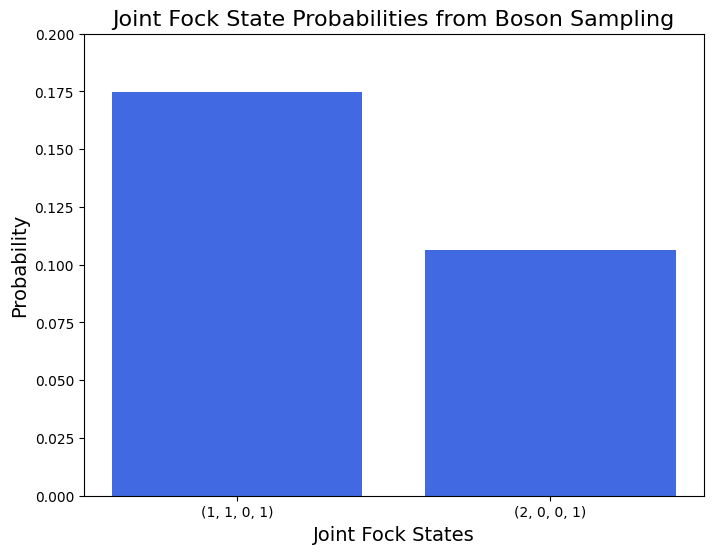

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Joint Fock state probabilities (example data)
joint_fock_states = ['(1, 1, 0, 1)', '(2, 0, 0, 1)']
probabilities = [0.17468916048563934, 0.10644192724642337]  # Replace these with actual results if available

# Plotting the probabilities
plt.figure(figsize=(8, 6))
plt.bar(joint_fock_states, probabilities, color='royalblue')

plt.xlabel('Joint Fock States', fontsize=14)
plt.ylabel('Probability', fontsize=14)
plt.title('Joint Fock State Probabilities from Boson Sampling', fontsize=16)
plt.ylim(0, 0.2)

# Display the plot
plt.show()


Experiment

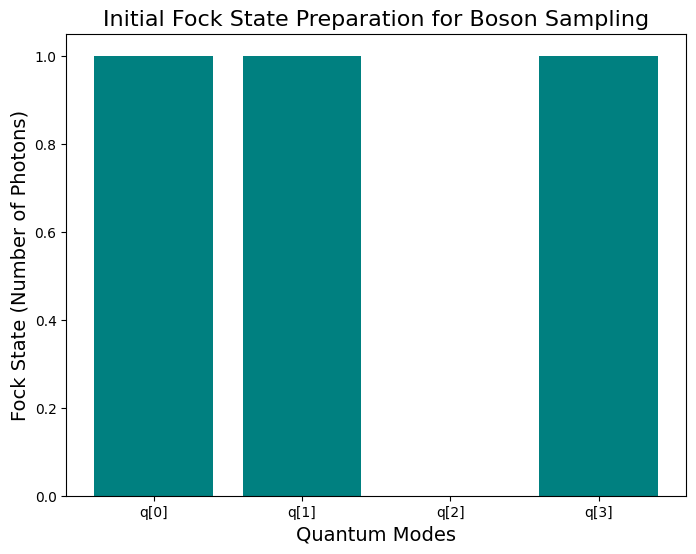

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the initial Fock state for each mode
modes = ['q[0]', 'q[1]', 'q[2]', 'q[3]']
fock_states = [1, 1, 0, 1]  # Fock(1), Fock(1), Vac (0), Fock(1)

# Plotting the Fock state distribution
plt.figure(figsize=(8, 6))
plt.bar(modes, fock_states, color='teal')

plt.xlabel('Quantum Modes', fontsize=14)
plt.ylabel('Fock State (Number of Photons)', fontsize=14)
plt.title('Initial Fock State Preparation for Boson Sampling', fontsize=16)

# Display the plot
plt.show()
